In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
import itertools
#plt.style.use('fivethirtyeight')

In [13]:
#Import data
ems = pd.read_csv('2020-2021.csv', parse_dates = [0])
#ems['Date'] = pd.to_datetime(ems['Date'], format='%Y-%m-%d')  #if parse_dates doesn't work
ems.head()

,Date,KWH,MMBTU
0,2020-01-01,0.00,NaN
1,2020-01-02,1968.50,0.00
2,2020-01-03,56212.46,0.00
3,2020-01-04,58228.93,4691.38
4,2020-01-05,49517.22,4733.57


In [14]:
# Import 2019 data and upsample (from week to day)
ems_2019 = pd.read_csv('2019.csv', parse_dates = [0])
ems_2019.head()

,Date,KWH,MMBTU
0,2018-12-31,52176.07201,27221.69844
1,2019-01-07,68092.55659,34580.72845
2,2019-01-14,67716.02044,35767.61072
3,2019-01-21,72512.57396,36810.89205
4,2019-01-28,71194.34623,37417.61581


In [15]:
upsampled_2019 = ems_2019.resample('D', on='Date').mean()
upsampled_2019.head(20)

,KWH,MMBTU
Date,,
2018-12-31,52176.07201,27221.69844
2019-01-01,NaN,NaN
2019-01-02,NaN,NaN
2019-01-03,NaN,NaN
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
2019-01-06,NaN,NaN
2019-01-07,68092.55659,34580.72845
2019-01-08,NaN,NaN


In [16]:
#Interpolate values
interpolated_2019 = upsampled_2019.interpolate(method='linear')

In [17]:
#interpolated_2019.head(40)
interpolated_2019.head(10)

,KWH,MMBTU
Date,,
2018-12-31,52176.072010,27221.698440
2019-01-01,54449.855521,28272.988441
2019-01-02,56723.639033,29324.278443
2019-01-03,58997.422544,30375.568444
2019-01-04,61271.206056,31426.858446
2019-01-05,63544.989567,32478.148447
2019-01-06,65818.773079,33529.438449
2019-01-07,68092.556590,34580.728450
2019-01-08,68038.765711,34750.283060


In [18]:
ems2 = ems.copy()
ems2 = ems2.set_index('Date').asfreq(freq='D')
ems2.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
               '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [19]:
#Merge Dataframes
ems_complete = pd.concat([interpolated_2019, ems2])
ems_complete.head()

,KWH,MMBTU
Date,,
2018-12-31,52176.072010,27221.698440
2019-01-01,54449.855521,28272.988441
2019-01-02,56723.639033,29324.278443
2019-01-03,58997.422544,30375.568444
2019-01-04,61271.206056,31426.858446


In [20]:
ems_complete.tail()

,KWH,MMBTU
Date,,
2021-06-27,430650.70,NaN
2021-06-28,50869.31,3979.69
2021-06-29,61357.89,10956.53
2021-06-30,60092.35,5517.11
2021-07-01,59515.12,0.00


In [21]:
ems_complete.info()
ems_complete[ems_complete['KWH']<0] #To check errors in data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 914 entries, 2018-12-31 to 2021-07-01
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KWH     868 non-null    float64
 1   MMBTU   841 non-null    float64
dtypes: float64(2)
memory usage: 21.4 KB


,KWH,MMBTU
Date,,
2020-02-25,-663358.82,0.00
2020-07-16,-888230.03,3825.33
2020-09-05,-9898055.18,13163.95
2020-10-15,-886382.79,5320.42
2021-01-18,-895301.22,0.00
2021-03-26,-9934485.22,5792.32
2021-04-20,-887357.56,5724.92


In [22]:
#Data Preprocessing
#ems[ems['KWH']<0]=0 # applies to all columns || This changes date to object type, doesnt work#

#Removing negative values from columns Clip pandas method
ems_complete['KWH'] = ems_complete['KWH'].clip(lower = 0)

ems_complete[ems_complete['KWH']<0] #Validation

,KWH,MMBTU
Date,,


In [23]:
#Replace zero to NAN for further replacement
cols = ["KWH","MMBTU"]
ems_complete[cols] = ems_complete[cols].replace({0:np.nan, 0:np.nan})

In [24]:
ems_complete.describe()

,KWH,MMBTU
count,859.000000,742.000000
mean,61451.564262,19385.100568
std,26648.973464,14491.023108
min,1968.500000,986.100000
25%,56949.170000,5013.072500
50%,64481.870000,12483.485000
75%,68423.195000,34015.457070
max,430650.700000,38531.448160


In [25]:
#Fill NaN with previous values
#Use fillna but require min_periods=2 meaning it will only fill a single NaN at a time, or rather 
#those NaNs that have two non-NaN numbers immediately preceeding it. 
#Then we use reduce to repeat this operation as many times as there are NaNs in col1

### First run fill NAN with the mean of previous 2 values for each column for KWh
ems_complete = reduce(lambda ems_complete, _: ems_complete.fillna(ems_complete.rolling(2, min_periods=2).mean().shift()), range(ems_complete['KWH'].isna().sum()), ems_complete)

In [26]:
### First run fill NAN with the mean of previous 2 values for each column for MMBTU
ems_complete = reduce(lambda ems_complete, _: ems_complete.fillna(ems_complete.rolling(2, min_periods=2).mean().shift()), range(ems_complete['MMBTU'].isna().sum()), ems_complete)

In [27]:
#Validate that there are no nan values
ems_complete.isna().sum()
ems_complete.head(10)
ems_complete.loc['2019-01-15':'2019-02-05']
ems.describe()
print(ems_complete.isna().sum())

KWH      0
MMBTU    0
dtype: int64


In [ ]:
## Second run, fill NAN with the mean of all values per column
##ems_complete = ems_complete.fillna(ems_complete.mean(numeric_only = True))

In [28]:
ems_complete.info()
ems_complete.describe()
ems_complete.loc['2020-01-01':'2020-01-05']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 914 entries, 2018-12-31 to 2021-07-01
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KWH     914 non-null    float64
 1   MMBTU   914 non-null    float64
dtypes: float64(2)
memory usage: 61.4 KB


,KWH,MMBTU
Date,,
2020-01-01,51786.371784,29004.664978
2020-01-02,1968.500000,29130.620239
2020-01-03,56212.460000,29067.642609
2020-01-04,58228.930000,4691.380000
2020-01-05,49517.220000,4733.570000


In [ ]:
# Feature engineering

In [29]:
#Date & time Features
ems_complete['Year'] = ems_complete.index.year
ems_complete['Month'] = ems_complete.index.month
ems_complete['Day'] = ems_complete.index.day

ems_complete['Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [30]:
#If date is weekend or weekday
ems_complete['weekend'] = ((ems_complete.index.dayofweek) >= 5).astype(int)
ems_complete['weekday'] = ((ems_complete.index.dayofweek) < 5).astype(int)

In [31]:
ems_complete['weekday2'] = ems_complete.index.weekday #The day of the week with Monday=0, Sunday=6
ems_complete.head()

,KWH,MMBTU,Year,Month,Day,weekend,weekday,weekday2
Date,,,,,,,,
2018-12-31,52176.072010,27221.698440,2018,12,31,0,1,0
2019-01-01,54449.855521,28272.988441,2019,1,1,0,1,1
2019-01-02,56723.639033,29324.278443,2019,1,2,0,1,2
2019-01-03,58997.422544,30375.568444,2019,1,3,0,1,3
2019-01-04,61271.206056,31426.858446,2019,1,4,0,1,4


In [ ]:
#ems_complete.to_csv('out.csv') # Export data if required

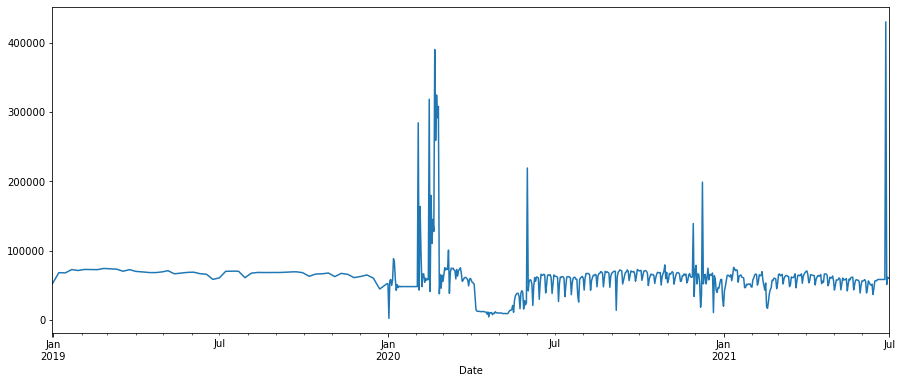

In [33]:
ems_complete['KWH'].plot(figsize=(15, 6))
plt.show()

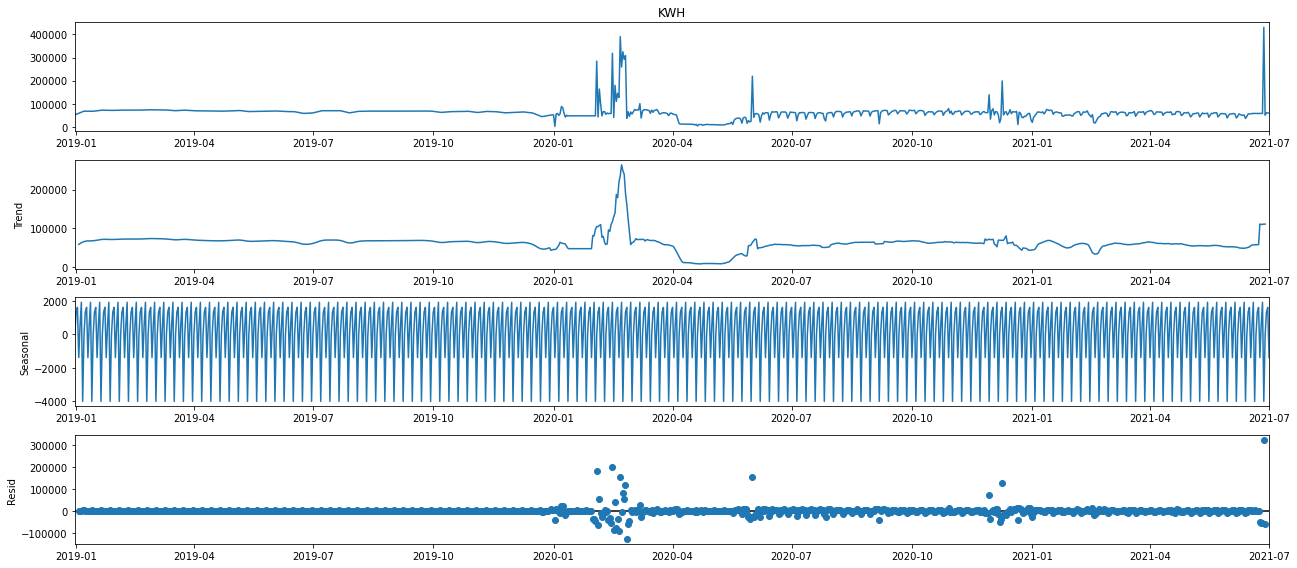

In [34]:
#Visualization to find  seasonality KWh
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ems_complete['KWH'], model='additive')
fig = decomposition.plot()
plt.show()

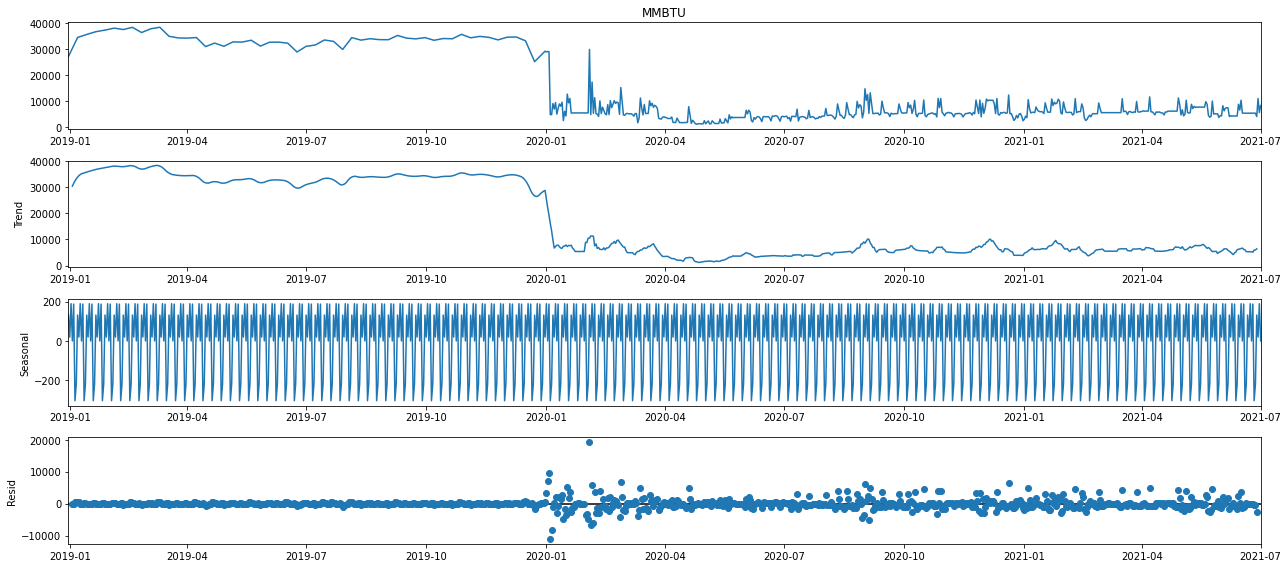

In [35]:
#Visualization to find  seasonality MMBTU
decomposition = sm.tsa.seasonal_decompose(ems_complete['MMBTU'], model='additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='weekday2', ylabel='KWH'>

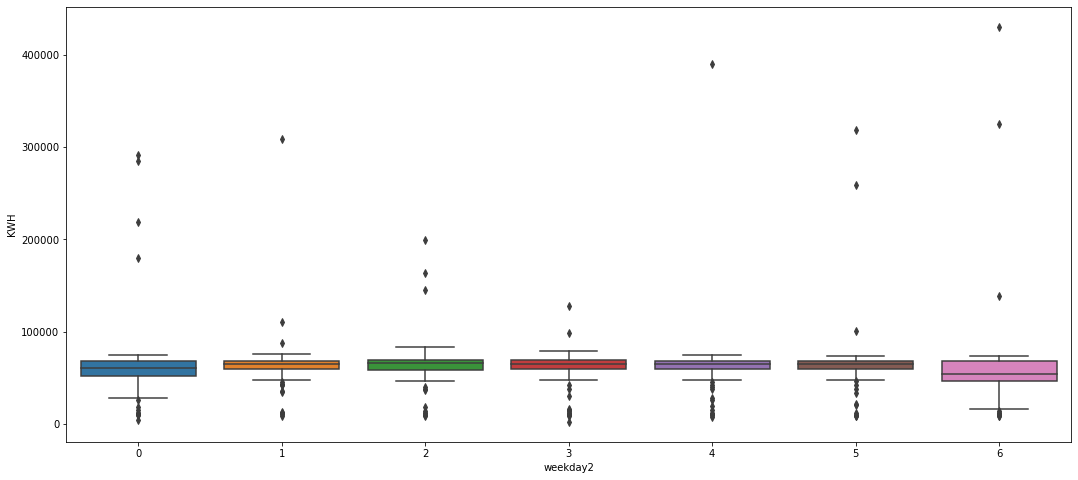

In [36]:
#Discovery
sns.boxplot(x="weekday2", y="KWH", data=ems_complete)

In [37]:
#Generate Monthly/weekly data
ems_monthly = ems_complete.resample('MS').mean() #for month
ems_weekly = ems_complete.resample('W-MON').mean() # for week starting monday

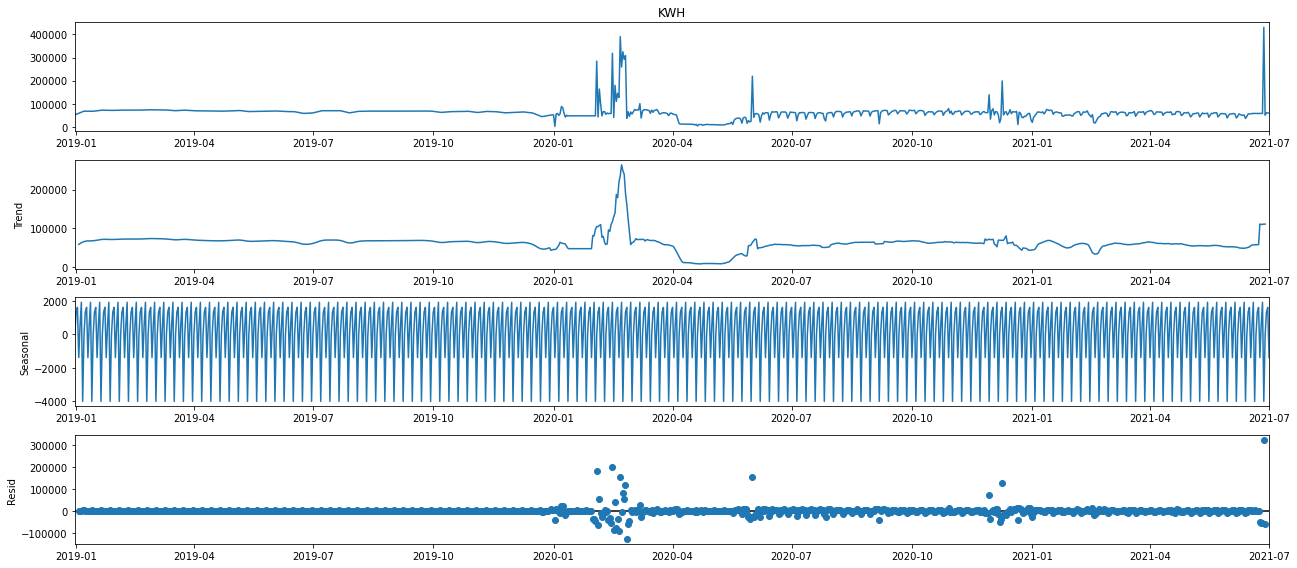

In [38]:
#Search for seasonality in monthly data
decomposition = sm.tsa.seasonal_decompose(ems_complete['KWH'], model='additive')
fig = decomposition.plot()
plt.show()

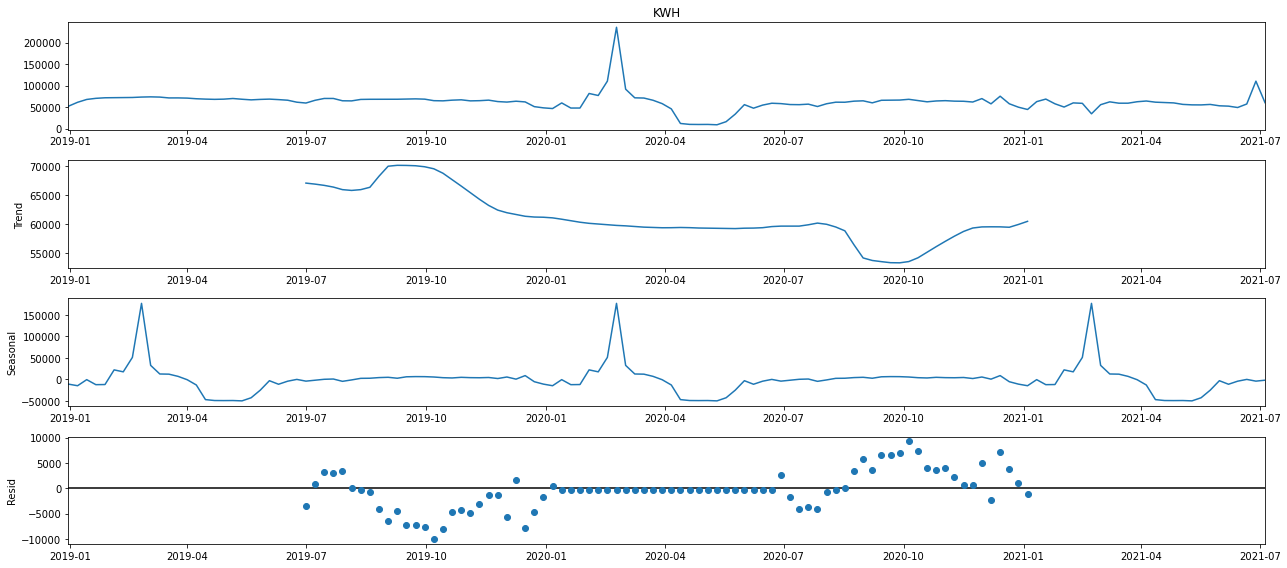

In [39]:
##Search for seasonality in weekly data
decomposition = sm.tsa.seasonal_decompose(ems_weekly['KWH'], model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
#Using for prediction ARIMA

p = d = q = range(1, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 2, 1, 12)
SARIMAX: (1, 2, 1) x (1, 2, 2, 12)
SARIMAX: (1, 2, 1) x (2, 1, 1, 12)


In [41]:
#Search for best parameters for KWH 

#Create an empty list to find later the best parameters
best_result = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ems_weekly['KWH'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            best_result.append([param, param_seasonal, results.aic])
        except:
            continue
            
best_result_df = pd.DataFrame(best_result, columns=['Param', 'Param_seasonal', 'AIC'])

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2413.0297325356696
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:2145.130157133774
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:2226.5632002687566
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:1936.757978105088
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:2167.5095616912854
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:2146.583251931281
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:1966.3691291882033
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:1938.6062203210108
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:2389.009722301745
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:2121.2831049393567
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:2203.0124103664994
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:1912.9217319355284
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:2165.9408055085432
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:2122.780444278662
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:1966.7958213707836
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:2420.6665866893172
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:2146.9246666709555
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:2233.31342873452

C:\Users\mpena\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:2133.1815856275366
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:2164.4157061602186
ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:2117.9499172207543


C:\Users\mpena\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:1960.9407815593204
ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:2097.844907935472
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:2409.0983484654303
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:2141.7917215036296
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:2223.908917681509
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:1933.3828196750494
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:2141.5326770744664
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:2143.3250345230454
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:1940.999713312036
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:1935.241176183732
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:2390.2223806058787
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:2122.6490558959167
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:2204.5711996599916
ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:1913.962430026508
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:2144.730579775745
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:2124.1961592011708
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:1944.8885248372967
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:1915.795157755738

C:\Users\mpena\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:1939.1549058767068
ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:2385.3759713863433
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:2115.0148240265153
ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:2194.5306168579864


C:\Users\mpena\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:1908.7053043581654
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:2137.6352593463844
ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:2115.777915697184
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:1932.8053018402884


C:\Users\mpena\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:2211.091315535063


In [42]:
#Best result is minimum AIC
best_result_df.min(axis=0)

Param                 (1, 1, 1)
Param_seasonal    (1, 1, 1, 12)
AIC                     1908.71
dtype: object

In [43]:
#Fitting model for best parameters
#best_result_df.min(axis=0)

mod = sm.tsa.statespace.SARIMAX(ems_weekly['KWH'],
                                order=best_result_df.min(axis=0)['Param'],
                                seasonal_order=best_result_df.min(axis=0)['Param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)


results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       9.072e-07      0.307   2.95e-06      1.000      -0.602       0.602
ma.L1         -0.3587      0.318     -1.128      0.259      -0.982       0.265
ar.S.L12      -0.1372      0.395     -0.348      0.728      -0.911       0.636
ma.S.L12      -0.9088      0.100     -9.077      0.000      -1.105      -0.713
sigma2      8.015e+08   1.03e-09    7.8e+17      0.000    8.01e+08    8.01e+08


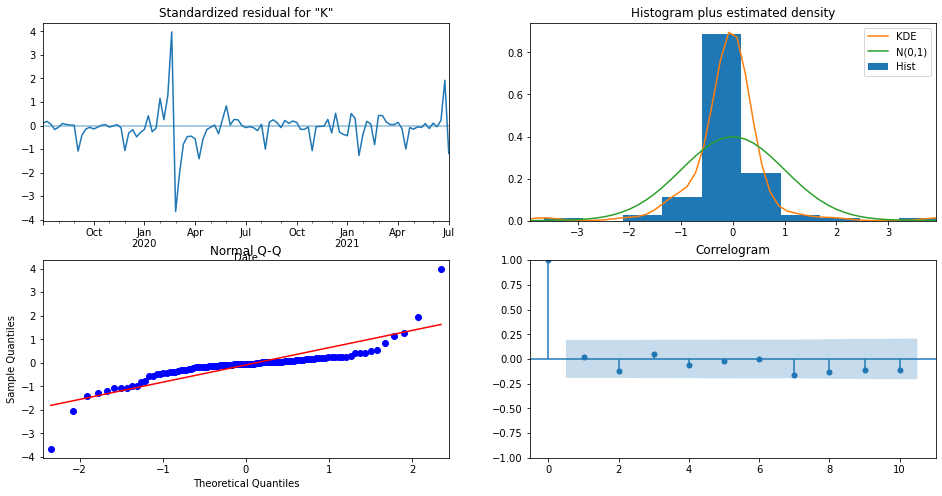

In [44]:
#Results
results.plot_diagnostics(figsize=(16, 8))
plt.show()

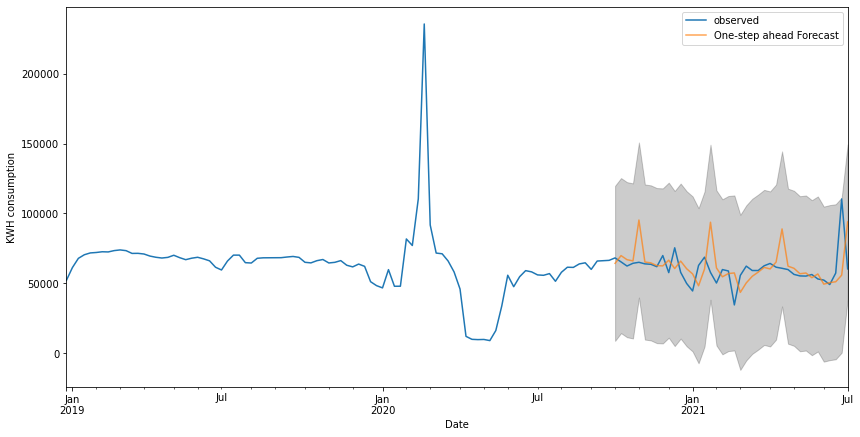

In [45]:
# prediction vs real with trained model

pred = results.get_prediction(start=pd.to_datetime('2020-10-05'), dynamic=False)
pred_ci = pred.conf_int()
ax = ems_weekly['2018':]['KWH'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KWH consumption')
plt.legend()
plt.show()

In [46]:
#Predictions
y_forecasted = pred.predicted_mean
#print(y_forecasted)
y_truth = ems_weekly['2020-10-05':]['KWH']
#print(y_truth)

In [47]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 15200.54


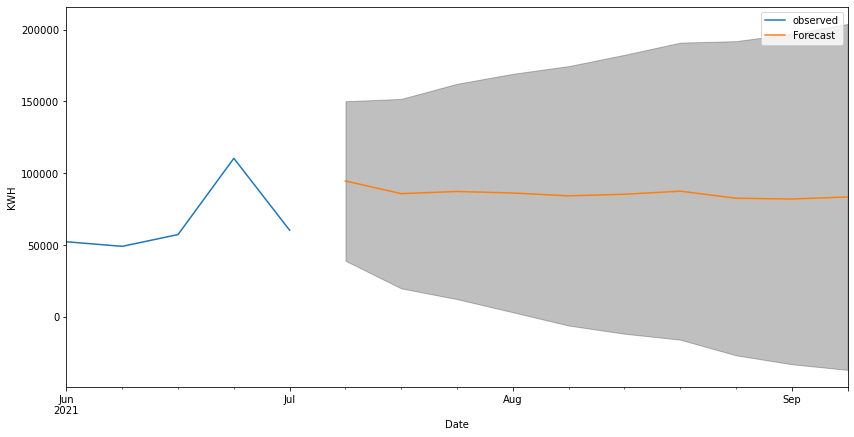

2021-07-12    94593.263999
2021-07-19    85797.055788
2021-07-26    87306.877308
2021-08-02    86222.874083
2021-08-09    84273.659182
2021-08-16    85362.954724
2021-08-23    87522.194827
2021-08-30    82604.977109
2021-09-06    82046.565376
2021-09-13    83500.879597
Freq: W-MON, Name: predicted_mean, dtype: float64


In [48]:
#Make predictions for next 10 weeks
from_date= ems_weekly.index[-5].date() #from last 5 weeks

pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = ems_weekly[from_date:]['KWH'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('KWH')
plt.legend()
plt.show()

print(pred_uc.predicted_mean)